<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> Used Car Listing Price Prediction</h1>
    
</div>

<center><img src="https://raw.githubusercontent.com/anthonynamnam/anthonynamnam/main/icons/image/car-banner.png" alt="memes" width="600" /></center>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h2> Project Overview</h2>
    
Please kindly refer to the github repo of this project: <a href="https://github.com/anthonynamnam/brainstation_capstone#project-overview">Link</a>

    
</div>


---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

   <h2> Notebook Overview</h2>
    
Now that we have a well-prepared dataset in hand, our next steps involve handling categorical variables, scaling features, addressing class imbalances, and ultimately building and evaluating predictive models. Each of these steps plays a pivotal role in the success of our machine learning and deep learning endeavors. In this notebook, we will guide you through the following steps of working with data:
    
<ol>
    <font size=3><li><b>Categorical Data Encoding 🎲</b></li></font>
    <p>Many machine learning algorithms require numerical inputs, necessitating the transformation of categorical variables into a format suitable for analysis. In this notebook, we'll explore various encoding techniques to convert categorical data into a numerical representation that our models can comprehend</p>
    <font size=3><li><b>Data Scaling 📐</b></li></font>
    <p>Ensuring that all features are on a consistent scale is crucial for the performance of many machine learning algorithms. We'll delve into the importance of data scaling and demonstrate methods to standardize or normalize our features.</p>
    <font size=3><li><b>Class Imbalance ⚖️</b></li></font>
    <p>Real-world datasets often exhibit imbalances in class distribution, where certain outcomes are more prevalent than others. We'll explore techniques to address class imbalances, ensuring that our models are trained to recognize patterns effectively.</p>
    <font size=3><li><b>ML/DL Modeling 🧠</b></li></font>
    <p>The heart of our predictive analytics journey lies in building machine learning and deep learning models. We'll guide you through the process of selecting, training, and fine-tuning models that best suit the nature of our data and the goals of our project.</p>
    <font size=3><li><b>Model Evaluation 🧮</b></li></font>
    <p>As we generate predictions, it becomes imperative to assess the performance of our models. We'll introduce metrics and techniques for evaluating model accuracy, precision, recall, and other key indicators to ensure that our models meet the desired standards.</p>

</ol>
Through this notebook, we aim to equip you with the knowledge and tools needed to navigate the intricacies of turning prepared data into actionable insights. Let's harness the power of machine learning and deep learning to uncover patterns, make predictions, and elevate the impact of our project.
    
</div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<a class="anchor" id="4-toc"> 
    <h2> Table of Contents </h2>
</a>
    
<ul>    
    <li> <a href="#4-setup">Notebook Set Up</a></li>
    <li> <a href="#4-func">Functions</a></li>
    <li> <a href="#4-load">Data Loading</a></li>
    <li> <a href="#4-cat-encode">Categorical Enconding</a></li>
    <li> <a href="#4-scale">Data Scaling</a></li>
    <li> <a href="#4-imbalance">Class Imbalance</a></li>
    <li> <a href="#4-models">Proposed Models</a></li>
    <li> <a href="#4-pipelines">Model Pipelines</a></li>
    <li> <a href="#4-evaluate">Model Evaluation</a></li>
<!--     <li> <a href="#4-learn">Learning/Takeaway</a></li> -->
</ul>
    
</div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-setup">
    <h2> Set Up </h2>
</a>
<b>Table of Content:</b>
<ul>    
    <li> <a href="#4-import">Import Library</a></li>
    <li> <a href="#4-const">Global Const</a></li>
</ul>
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-import">
<h3> Import Library </h3>
</a>
</div>

In [173]:
import time
import random
import logging
import warnings
import datetime

# Data Science Package
import numpy as np
import pandas as pd

import sys
import logging

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-const">
<h3> Global Constant </h3>
</a>
</div>

In [174]:

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
ran = random.Random()
ran.seed(42)

In [175]:

logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s >>> %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    handlers=[
                        logging.FileHandler(filename='log/modelling.log'),
                        logging.StreamHandler(sys.stdout)
                    ])
logger = logging.getLogger('LOGGER_NAME')

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-func">
    <h2> Functions </h2>
</a>
<b>Table of Content:</b>
<ul>    
    <li> <a href="#4-func-print">Helper Funcntions (Print Info)</a></li>
    <li> <a href="#4-func-edit">Helper Funcntions (Edit Dataframe)</a></li>
</ul>
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-func-print">
<h3> Helper Funcntions (Print Info) </h3>
</a>
</div>

In [176]:
# Helper Functions to print df info and statement
import pandas as pd

def print_num_row(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Retrieve the number of rows of dataframe and print it as a statement.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    df = pd.DataFrame(data = {"height":[147,190],"weight":[47,72],"age":[12,28]},index = [0,1])
    print_num_row(df)  =>
        |
        | "The dataframe has 2 rows of record now."
        |
    
    
    """
    print(f"The dataframe has {df.shape[0]} rows of record now.")
    return
    

def print_num_col(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Retrieve the number of columns of dataframe and print it as a statement.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    df = pd.DataFrame(data = {"height":[147,190],"weight":[47,72],"age":[12,28]},index = [0,1])
    print_num_col(df) => 
        |
        | "The dataframe has 3 columns now."
        |
    
    
    """
    print(f"The dataframe has {df.shape[1]} columns now.")
    return
        
def print_dim(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Retrieve the shape of dataframe and print it as a statement.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,72],"age":[12,28]},index = [0,1])
    print_dim(abc_df) =>
        |
        | "There are 2 rows and 3 columns in this dataframe now."
        |
    
    
    """
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataframe now.")
    return


def print_null_count(df: pd.DataFrame,cols:list = []) -> None:
    """
    Description
    -----
    Count the null value in each columns.
    If `cols` is provided, only show the null value count for the columns in `cols`. 
    Otherwise, show null value count for all columns.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    cols (list): the column names to show the null value count. Default: []
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,np.nan],"age":[np.nan,28]},index = [0,1])
    print_null_count(abc_df) => 
        |
        | === Null Count ===
        | height    0
        | weight    1
        | age       2
        | dtype: int64
        |
        
    print_null_count(abc_df,cols=["age"]) => 
        |
        | === Null Count ===
        | Column `age`: 2
        |
        
    print_null_count(abc_df,cols=["age","weight"]) => 
        |
        | === Null Count ===
        | Column `age`: 2
        | Column `weight`: 1
        |
    
    """
    if len(cols) == 0:
        null_count = df.isnull().sum()
        
        print("=== Null Count ===")
        print(null_count)
    else:
        assert set(cols).issubset(df.columns)
        null_count = df[cols].isnull().sum()
        
        print("=== Null Count ===")
        for col in cols:
            print(f"Column `{col}`: {null_count[col]}")
    return 


def print_null_pct(df: pd.DataFrame,cols:list = []) -> None:
    """
    Description
    -----
    Count the null percentage in each columns.
    If `cols` is provided, only show the null percentage for the columns in `cols`. 
    Otherwise, show null percentage for all columns.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    cols (list): the column names to show the null percentage. Default: []
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,np.nan],"age":[np.nan,np.nan]},index = [0,1])
    print_null_pct(abc_df) => 
        |
        | === Null Count Precentage ===
        | height      0.0%
        | weight     50.0%
        | age       100.0%
        | dtype: object
        |
        
    print_null_pct(abc_df,cols=["weight"]) => 
        |
        | === Null Count Precentage ===
        | Column weight: 50.0%
        |
    
    """
    total_row = df.shape[0]
    if len(cols) == 0:
        null_count = df.isnull().sum()
        null_pct = null_count / total_row * 100
        
        print("=== Null Count Precentage ===")
        print(null_pct.round(2).astype(str)+"%")
    else:
        assert set(cols).issubset(df.columns)
        null_count = df[cols].isnull().sum()
        null_pct = null_count / total_row * 100

        print("=== Null Count Precentage ===")
        for col in cols:
            print(f"Column {col}: {round(null_pct[col],4)}%")
    return

def print_duplicated_count(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Count the number of duplicated rows.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190,147],"weight":[47,np.nan,47],"age":[13,27,13]},index = [0,1,2])
    print_duplicated_count(abc_df) => 
        |
        | There are 1 duplicated rows
        | 
        
    """
    print(f"There are {df.duplicated().sum()} duplicated rows")
    return



<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-func-edit">
<h3> Helper Funcntions (Edit Dataframe) </h3>
</a>
</div>

In [177]:
def drop_cols_if_exist(df: pd.DataFrame,cols_to_drop:list) -> pd.DataFrame:
    """
    Description
    -----
    Drop a column from a dataframe with inplace = True. Only execute the dropping if the cols exist.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    cols_to_drop (list): the list of column to be dropped
    
    Returns
    -----
    df (pd.DataFrame): the dataframe with columns dropped
    
    Example
    -----
    # Create a DataFrame
    abc_df = pd.DataFrame(data = {"height":[147,190,147],"weight":[47,np.nan,47],"age":[13,27,13]},index = [0,1,2])
    print(abc_df)  =>
        |
        |    height  weight  age
        | 0     147    47.0   13
        | 1     190     NaN   27
        | 2     147    47.0   13
        |
        
    # Drop columns if exist
    dropped_abc_df = drop_cols_if_exist(abc_df,cols_to_drop=["weight"])
    print(dropped_abc_df)   =>
        | Successfully dropped columns: {'weight'}
        |    height  age
        | 0     147   13
        | 1     190   27
        | 2     147   13
    
    
    """
    intersect_cols = set(cols_to_drop).intersection(df.columns)
    df.drop(columns=intersect_cols,inplace=True)
    print(f"Successfully dropped columns: {intersect_cols}")
    return df    

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-load">
    <h2> Data Loading </h2>
</a>
<b>Table of Content:</b>
<ul>    
    <li> <a href="#4-load-process">Load Processed Data</a></li>
    <li> <a href="#4-san-check-train">Sanity Check - Train Data</a></li>
    <li> <a href="#4-san-check-test">Sanity Check - Train Data</a></li>
    <li> <a href="#4-split-xy">Split Data</a></li>
</ul>
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-load-process">
<h3> Load the Split data </h3>
</a>
</div>

In [178]:
# Define dtype for split dataset
SPLIT_COL_DTYPE = {
    
    "log_miles":float,
    "year":int,
    "make":str,
    "model":str,
    "trim":str,
    "body_type":str,
    "vehicle_type":str,
    "drivetrain":str,
    "transmission":str,
    "engine_size":float,
    "engine_block":str,
    "price_range":int,
    
    # For encoded fuel type
    "fuel_M85":int,
    "fuel_Lpg":int,
    "fuel_Diesel":int,
    "fuel_Unleaded":int,
    "fuel_Hydrogen":int,
    "fuel_PremiumUnleaded":int,
    "fuel_Biodiesel":int,
    "fuel_E85":int,
    "fuel_Electric":int,
    "fuel_CompressedNaturalGas":int,
}

In [179]:
# First, we read the train dataset
train_data = pd.read_parquet(path = "data/train-data.parquet",
                     columns = SPLIT_COL_DTYPE)
train_data.reset_index(drop = True, inplace=True)

In [180]:
# Then, we read the testt dataset
test_data = pd.read_parquet(path = "data/test-data.parquet",
                     columns = SPLIT_COL_DTYPE)
test_data.reset_index(drop = True, inplace=True)

In [181]:
col_to_drop = []

In [182]:
train_data.drop(columns=col_to_drop,inplace = True)
train_data.head(3)

,log_miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,engine_size,engine_block,price_range,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
0,8.353497,2020.0,Toyota,Tacoma,SR5,Pickup,Truck,4WD,Automatic,3.5,V,3,0,0,0,1,0,0,0,0,0,0
1,9.780189,2018.0,RAM,Ram 1500 Pickup,Big Horn,Pickup,Truck,RWD,Automatic,3.0,V,3,0,0,1,0,0,0,0,0,0,0
2,9.922555,2018.0,Lexus,ES,350,Sedan,Car,FWD,Automatic,3.5,V,3,0,0,0,1,0,0,0,0,0,0


In [183]:
test_data.drop(columns=col_to_drop,inplace = True)
test_data.head(3)

,log_miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,engine_size,engine_block,price_range,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
0,11.532738,2014.0,Jeep,Wrangler Unlimited,Sahara,SUV,Truck,4WD,Manual,3.6,V,2,0,0,0,1,0,0,0,0,0,0
1,12.028894,2012.0,Honda,Accord,EX-L V6,Coupe,Car,FWD,Automatic,3.5,V,1,0,0,0,1,0,0,0,0,0,0
2,10.063947,2020.0,Kia,FORTE,LXS,Sedan,Car,FWD,Automatic,2.0,I,2,0,0,0,1,0,0,0,0,0,0


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-san-check-train">
<h3> Sanity Check - Train </h3>
</a>
</div>

In [184]:
train_data.head()

,log_miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,engine_size,engine_block,price_range,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
0,8.353497,2020.0,Toyota,Tacoma,SR5,Pickup,Truck,4WD,Automatic,3.5,V,3,0,0,0,1,0,0,0,0,0,0
1,9.780189,2018.0,RAM,Ram 1500 Pickup,Big Horn,Pickup,Truck,RWD,Automatic,3.0,V,3,0,0,1,0,0,0,0,0,0,0
2,9.922555,2018.0,Lexus,ES,350,Sedan,Car,FWD,Automatic,3.5,V,3,0,0,0,1,0,0,0,0,0,0
3,10.928507,2017.0,BMW,X5,sDrive35i,SUV,Truck,RWD,Automatic,3.0,I,3,0,0,0,0,0,1,0,0,0,0
4,11.268992,2015.0,Scion,tC,Release Series 9.0,Coupe,Car,FWD,Automatic,2.5,I,1,0,0,0,1,0,0,0,0,0,0


In [185]:
print_dim(train_data)

There are 1764450 rows and 22 columns in this dataframe now.


In [186]:
print_null_count(train_data)

=== Null Count ===
log_miles                    0
year                         0
make                         0
model                        0
trim                         0
body_type                    0
vehicle_type                 0
drivetrain                   0
transmission                 0
engine_size                  0
engine_block                 0
price_range                  0
fuel_M85                     0
fuel_Lpg                     0
fuel_Diesel                  0
fuel_Unleaded                0
fuel_Hydrogen                0
fuel_PremiumUnleaded         0
fuel_Biodiesel               0
fuel_E85                     0
fuel_Electric                0
fuel_CompressedNaturalGas    0
dtype: int64


In [187]:
print_duplicated_count(train_data)

There are 23968 duplicated rows


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-san-check-test">
<h3> Sanity Check - Test </h3>
</a>
</div>

In [188]:
test_data.head()

,log_miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,engine_size,engine_block,price_range,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
0,11.532738,2014.0,Jeep,Wrangler Unlimited,Sahara,SUV,Truck,4WD,Manual,3.6,V,2,0,0,0,1,0,0,0,0,0,0
1,12.028894,2012.0,Honda,Accord,EX-L V6,Coupe,Car,FWD,Automatic,3.5,V,1,0,0,0,1,0,0,0,0,0,0
2,10.063947,2020.0,Kia,FORTE,LXS,Sedan,Car,FWD,Automatic,2.0,I,2,0,0,0,1,0,0,0,0,0,0
3,10.526024,2019.0,Jeep,Grand Cherokee,High Altitude,SUV,Truck,4WD,Automatic,3.6,V,4,0,0,0,1,0,0,0,0,0,0
4,10.633834,2018.0,Volkswagen,Tiguan,SE,SUV,Truck,4WD,Automatic,2.0,I,2,0,0,0,1,0,0,0,0,0,0


In [189]:
print_dim(test_data)

There are 588151 rows and 22 columns in this dataframe now.


In [190]:
print_null_count(test_data)

=== Null Count ===
log_miles                    0
year                         0
make                         0
model                        0
trim                         0
body_type                    0
vehicle_type                 0
drivetrain                   0
transmission                 0
engine_size                  0
engine_block                 0
price_range                  0
fuel_M85                     0
fuel_Lpg                     0
fuel_Diesel                  0
fuel_Unleaded                0
fuel_Hydrogen                0
fuel_PremiumUnleaded         0
fuel_Biodiesel               0
fuel_E85                     0
fuel_Electric                0
fuel_CompressedNaturalGas    0
dtype: int64


In [191]:
print_duplicated_count(test_data)

There are 4218 duplicated rows


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-split-xy">
<h3> Split Data into X and y </h3>
</a>
</div>

In [192]:
X_train = train_data.drop(columns=["price_range"])
y_train = train_data["price_range"]

In [193]:
X_test= test_data.drop(columns=["price_range"])
y_test = test_data["price_range"]

In [194]:
# Sanity check
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1764450, 21) (588151, 21) (1764450,) (588151,)


[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-cat-encode">
    <h2> Categorical Encoding </h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
<br><br>
After some researches, we concluded that these are the available encoding options for our dataset.  

- `Dummy Encoding` (keep all categories)
- `Dummy Encoding` (with fixed number of category, i.e. top 10 most frequent categories)
- `Dummy Encoding` (with value counts percentage threshold, i.e. only keep categories with more than X% of total records)
- `Ordinal Encoding` (for category with ordinal meaning)
- `Count Encoding` (Data Leakage if no split data) `->` Use `sklearn`.`Pipeline`
- `Target Encoding`  (Data Leakage if no split data) `->` Use `sklearn`.`Pipeline`

**However**, some of them are not suitable for our columns.

`Count Enconding`: It is not useful as we have > 7M records and some values may have over millions count.  
`Ordinal Encoding`: Our categorical columns generally do not consist of any order or level, so ordinal enconding may not be useful at all in this scenario.  

<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- From the above table, as we do not want to expand our feature spaces too much. We will apply target encoding to columns `make`, `model`, `trim` and `body_type`.

- Advantages of `target encoding`:
    1. `Target encoding` will not expand our feature spaces.
    1. `Target encoding` is encoded by averaging target variable (`price_range`) within each feature group (`model`), which mean the encoded value is the average `price_range` of that `model`. 
    
- Disadvantage of `target encoding`:
    1. As the averaging process will gather the information across different rows, this may lead to **data leakage**. So, we will not perform encoding transformation here. Instead, we will embed the transformation in modelling pipeline.

- For other columns, we will apply `dummy variable encoding`, which may not consist of data leakage problem.
    
- In order to integrate encoder with cross validation, we will embed the encoder into pipeline in modelling section.

<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-scale">
    <h2> Data Scaling </h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
<br><br>
There are three available encoding options for our dataset.  
    
---
- `Standard Scaling`
    - Output space: `[-inf,inf]` with `mean` of 0 and `variance` of 1
    - Characteristics:
        - Useful when features have different units
        - Sensitive to outliers
---
- `Min-Max Scaling`
    - Output space: `[0,1]`
    - Characteristics:
        - Maintains the shape of the original distribution
        - Sensitive to outliers
---
- `Robust Scaling`
    - Output space: `[-inf,inf]`
    - Characteristics:
        - Effective in the presence of outliers, as it uses the median and IQR.
        - Maintains the central tendency (Data tends to stay at the center)
    

<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

In our dataset, there are several feature types:
- `Categorical Features` (e.g. `make`, `drivetrain`)
- `Numerical Features` (e.g. `year`, `log_miles`)

---
    
- For `Categorical Features`, as we will apply `one-hot encoding` and `target encoding`. The output space of both method are in `[0,1]` too. If we apply Min-Max Scaling, it does not change anything. If we apply `standard scaling`, it would change the scale from `[0,1]` to `[-inf, inf]`. Therefore, we should not apply any scaling on it.
    
- For `Numerical Features`, as they have different magnitude scales, we should apply `standard scaling` on it.

<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-imbalance">
    <h2> Class Imbalance</h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>❓ What is Class Imbalance?</b></font>
<br><br>
    <p><b>Class imbalance</b> refers to a situation in a classification problem where the distribution of the classes is not uniform, meaning that one or more classes have significantly fewer instances than the others. In other words, there is an unequal distribution of target labels in the dataset, and one or more classes are underrepresented compared to the others.</p>
<br>
    <p>For our classification task, which is <b>multi-class classification</b>, class imbalance can refer to <b>unequal distribution</b> across multiple classes. </p>

<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 How to tackle Class Imbalance?</b></font>
<br><br>

There are several techniques for **Class Imbalance**.  
1. Resampling
    - **Over Sampling**
    - **Under Sampling**
    - **Hybrid Sampling** (Over Sampling on Minority Class + Under Sampling on Majority Class) (To be tested)
2. Synthetic Data Generation
    - <b>S</b>ynthetic <b>M</b>inority <b>O</b>ver sampling <b>TE</b>chnique <b>(SMOTE)</b>
    - <b>S</b>ynthetic <b>M</b>inority <b>O</b>ver sampling <b>TE</b>chnique for <b>N</b>ominal & <b>C</b>ontinuous <b>(SMOTENC)</b>

    

<div>

In [195]:
y_train.value_counts()/y_train.shape[0]

price_range
2    0.441874
1    0.270052
3    0.197019
4    0.061067
5    0.029989
Name: count, dtype: float64

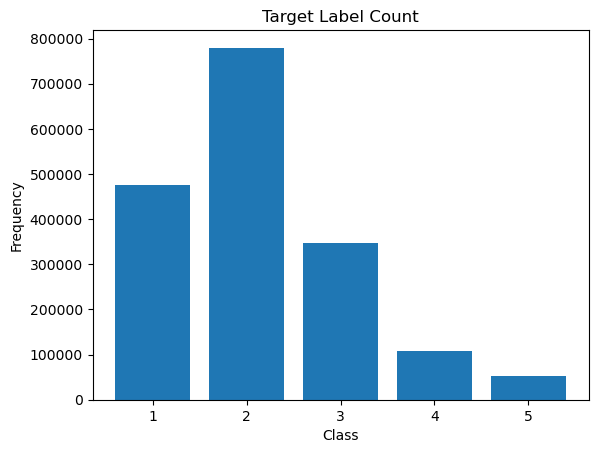

In [242]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(y_train.value_counts().index,y_train.value_counts().values)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Target Label Count")
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- According to above table, we can see that the minority class only consist of **3%** of the total data, if we apply **undersampling**, we will result in **15%** of data and lose **85%** of the information.
    
- According to above table, we can see that the ratio of majority class and minority class is **15:1**. If we apply **oversampling**, we will duplicate **15** times of the minority class.
    
**[After first-round of experiment]**  
- We find that oversampling on minority class does not improve our most of our model.
- Perhaps we can also consider hybrid sampling in next sprint, which combines both the oversampling and undersampling
    
<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-models">
    <h2> Proposed Models </h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Ideas:</b></font>


- [x] Logistic Regression
- [x] Decision Tree
- [x] Stochastic Gradient Boosting
- [x] AdaBoost
- [x] XGBoost
- [ ] Random Forest
- [ ] CatBoost
- [ ] Naive Bayes
- [ ] K-Nearest Neighbor
- [ ] Neural Network (Less Deep)
- [ ] Neural Network (Medium Deep)
- [ ] Neural Network (More Deep)


<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-pipelines">
    <h2> Model Pipelines with 10% of data</h2>
</a>

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

<!-- - For faster training process, we will use 10% of our training data (Around 170K Rows) here by using `train_test_split` and setting `stratify` = `y`. -->
- We will apply Oversampling technique to deal with class imbalance.
- We will apply Grid Search CV with 5-fold for getting the optimized parameters.
    
<div>

<div style="bensembler-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Classes for Model Pipelines </h3>
</a>

</div>

In [281]:
import os
import datetime
import pprint
import pandas as pd

from types import FunctionType

import marshal
import joblib

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,train_test_split
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, StandardScaler, MinMaxScaler, LabelEncoder,FunctionTransformer
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler,SMOTENC
from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb



model_performance_dict = {
    "timestamp":None,
    "model_name": None,
    "model": None,
    
    "sub_sampling":False,
    "sub_sampling_time":0,
    "sub_sampling_pct_X_train":None,
    "sub_sampling_pct_X_test":None,
    
    "over_sampling":False,
    "over_sampling_time":0,
    
    "X_train_shape":None,
    "X_test_shape":None,
    
    "target_encoding": False,
    "target_encoding_col": [],
    "one_hot_encoding": False,
    "one_hot_encoding_col": [],
    
    "standard_scaling": False,
    "standard_scaling_col": [],
    "min_max_scaling": False,
    "min_max_scaling_col": [],
    
    "drop_column": False,
    "dropped_columns":[],
    
    "pca": False,
    "pca_n_components": None,
    
    "scoring":None,
    
    "grid_search": False,
    "best_params": None,
    "best_train_score": None,
    
    "params": None,
    "train_score": None,
    
    
    "test_score": None,    
    "confusion_matrix": None,
}


class ModelPerf:
    
    _data = None
    _path = None

    def __init__(self,path,read = True):
        self._path = path
        # try to load the previous file
        if read:
            self.read_csv()
        
    def _is_path_valid(self):
        os.path.isfile(self._path)
        
    def read_csv(self):
        try:
            self._data = pd.read_csv(self._path)
        except Exception as e:
            logger.info(f"Creating new model performance file...")
            self._data = pd.DataFrame()
            
    def export_csv(self):
        if self._data.shape[0] > 0:
            self._data.to_csv(self._path,index = False)
            logger.info(f"Model Performance CSV is exported at {self._path}")
        else:
            logger.warning(f"Model Performance is empty")
            
    def add_data(self,new_data:dict,export = True):
        new_df = pd.DataFrame([new_data])
        self._data = pd.concat([self._data,new_df])
        self._data.sort_values(by=["model_name"],ascending = [True],inplace = True)
        self._data.reset_index(drop = True, inplace=True)
        if export:
            self.export_csv()
            
    def del_data(self,model_name: str):
        self._data = self._data[self._data["model_name"] != model_name]
        logger.info(f"Result for model {model_name} is deleted.")
        
    def get_data(self):
        return self._data
    
    def print_data(self):
        print(self.get_data())
        
    


class MyModel:
    
    def __init__(self,
                 X_train,X_test,
                 y_train,y_test,
                 train_subsample_size = None,
                 test_subsample_size = None):
        # Random State
        self._random_state = 42
        self._train_subsample_size = train_subsample_size
        self._test_subsample_size = test_subsample_size
        
        # Store the data
        self.X_train = X_train.copy()
        self.le = LabelEncoder()
        self.y_train = pd.Series(self.le.fit_transform(y_train),index= y_train)
            
        self.X_test = X_test.copy()
        self.y_test = pd.Series(self.le.transform(y_test),index= y_test)
        
        self.print_data_size()
                
        self._classes = sorted(list(set(y_train)))
        
        # Default is 5-fold
        self.cv = None
        
        # Subsampling
        self._subsampled = False
        
        # Diff Types of Sampling
        self._sampled = False
        self._sampling_name = None
        
        # Custom Encoder
        self._one_hot_transformer = None
        self._one_hot_col = []
        self._tar_end_transformer = None
        self._tar_end_col = []
        self.encoder = None
        self._encoder_steps = []
        self._encoder_name = ""
        
        # Custom Scaler
        self._standard_scaler = None
        self._ss_col = []
        self._min_max_scaler = None
        self._mm_col = []
        self.scaler = None
        self._scaler_steps = []
        self._scaler_name = ""
        
        # Column Dropper
        self.dropped_col = False
        self._dropped_columns = []
        
        # Custom PCA
        self.pca = None
        self._pca_name = None
        self._pca_n_components = None
        
        # Grid Search
        self._use_grid_search= False
        self.grid_search = None
        self.gs_params = {}
        
        # Custom Model
        self.model = None
        self._model_name = ""
        
        # Custom Score
        self._scoring = "f1_weighted"
        self._scoring_func = lambda y_true,y_pred: f1_score(y_true,y_pred,average = "weighted")
        
        # Custom Pipeline
        self.pipeline = None
        self._pipeline_steps = []
        
        # Prediction
        self.train_y_pred = None
        self.y_pred = None
        self.y_prob = None
        
        # Timer
        self._subsample_time = None
        self._sampling_time = None
        self._fit_time = None
        self._predict_time = None
        
        
        # Model Performance
        self.model_perf = None
        self._raw_cm = None
        self._cm = None
        self._cv_results = None
        
    def init_drop_columns(self,cols_to_drop=[]):
        if len(cols_to_drop) == 0:
            self.dropped_col = False
        else:        
            start_time = time.time()
            logger.info("Dropping Columns...")
            available_col = self.X_train.columns
            cols_to_drop = list(filter(lambda col: col in available_col,cols_to_drop))
            self.dropped_col = cols_to_drop
            self.dropped_col = True
            self.X_train.drop(columns=cols_to_drop,inplace= True) 
            self.X_test.drop(columns=cols_to_drop,inplace= True) 
            end_time = time.time()
            logger.info(f"Dropping Columns Completed | Time elapsed: {self.time_to_str(end_time - start_time)}")
            self.print_data_size(title = "After Dropping Columns")
        
    def init_subsampling(self):
        if self._train_subsample_size is not None or self._test_subsample_size is not None:
            start_time = time.time()
            logger.info("Sub-sampling on Train Data...")
            
            if self._train_subsample_size is not None:
                # Sample the train dataset with train_test_split function
                self.X_train, _, self.y_train, _ = train_test_split(self.X_train, self.y_train,
                                                                    stratify = self.y_train, 
                                                                    train_size = self._train_subsample_size,
                                                                    random_state = self._random_state)
            if self._test_subsample_size is not None:
                # Sample the test dataset with train_test_split function
                _, self.X_test, _ ,self.y_test= train_test_split(self.X_test, self.y_test,
                                                                 stratify = self.y_test, 
                                                                 test_size = self._test_subsample_size, 
                                                                 random_state = self._random_state)

            end_time = time.time()
            
            self._subsample_time = end_time - start_time
            logger.info(f"Subsampling Completed | Time elapsed: {self.time_to_str(self._subsample_time)}")
            self.print_data_size(title = "After Subsampling")
            self._subsampled = True
            
        else: 
            logger.error("If init_subsampling(), 'train_subsample_size' & 'test_subsample_size' cannot be None.")
            logger.info("No Subsampling is applied.")
            self.print_empty()
        
    def init_customer_over_sampling(self):
        assert not self._sampled,"Already sampled."
        start_time = time.time()
        self._sampling_name = "Custom Over Samping"
        
        logger.info(f"{self._sampling_name} on Train Data...")
        self.X_train, self.y_train = self.customer_random_over_sampling(self.X_train,self.y_train)
        
        end_time = time.time()
        
        self._sampling_time = end_time - start_time
        logger.info(f"{self._sampling_name} Completed | Time elapsed: {self.time_to_str(self._sampling_time)}")
        self.print_data_size(title = f"After {self._sampling_name}")
        self._sampled = True
        
    
    def init_smotenc(self):
        assert not self._sampled,"Already sampled."
        start_time = time.time()
        self._sampling_name = "SMOTENC Over Sampling"
        
        logger.info(f"{self._sampling_name} on Train Data...")
        snc = SMOTENC(categorical_features = ["make","model","trim",
                                              "body_type","vehicle_type","transmission",
                                              "drivetrain","engine_block"],random_state = 42)
        self.X_train,self.y_train = snc.fit_resample(self.X_train,self.y_train)
        
        end_time = time.time()
        
        self._sampling_time = end_time - start_time
        logger.info(f"{self._sampling_name} Completed | Time elapsed: {self.time_to_str(self._sampling_time)}")
        self.print_data_size(title = f"After {self._sampling_name}")
        self._sampled = True
        
    def init_over_sampling(self):
        assert not self._sampled,"Already sampled."
        start_time = time.time()
        self._sampling_name = "Random Over Samping"
        
        logger.info(f"{self._sampling_name} on Train Data...")
        ros = RandomOverSampler(random_state = 42)
        self.X_train,self.y_train = ros.fit_resample(self.X_train,self.y_train)
        
        end_time = time.time()
        
        self._sampling_time = end_time - start_time
        logger.info(f"{self._sampling_name} Completed | Time elapsed: {self.time_to_str(self._sampling_time)}")
        self.print_data_size(title = f"After {self._sampling_name}")
        self._sampled = True
    
    # For Hybrid Samping
    def _under_sample_target_size(self,target_class: int):
        target_class = self.le.transform([target_class])[0]
        size_dict = dict(self.y_train.value_counts())
        target_size = size_dict[target_class]
        for k,v in size_dict.items():
            if v > target_size:
                size_dict[k]=target_size
        return size_dict
    
    # For Hybrid Samping
    def _over_sample_target_size(self,target_class: int):
        target_class = self.le.transform([target_class])[0]
        size_dict = dict(self.y_train.value_counts())
        target_size = size_dict[target_class]
        for k,v in size_dict.items():
            if v < target_size:
                size_dict[k]=target_size
        return size_dict
    
    def init_hybrid_sampling(self,target_class:int):
        assert not self._sampled,"Already sampled."
        start_time = time.time()
        self._sampling_name = "Hybrid Samping"
        
        logger.info(f"{self._sampling_name} on Train Data...")
        
        assert target_class in self.y_train.value_counts().index, "'target_class' is not in target_variable"
        
        rus = RandomUnderSampler(sampling_strategy = self._under_sample_target_size(target_class),
                                 random_state=42)
        self.X_train,self.y_train = rus.fit_resample(self.X_train,self.y_train)
        
        
        ros = RandomOverSampler(sampling_strategy = self._over_sample_target_size(target_class),
                                 random_state=42)
        self.X_train,self.y_train = ros.fit_resample(self.X_train,self.y_train)
        
        end_time = time.time()
        self._sampling_time = end_time - start_time
        logger.info(f"{self._sampling_name} Completed | Time elapsed: {self.time_to_str(self._sampling_time)}")
        self.print_data_size(title = f"After {self._sampling_name}")
        self._sampled = True
    
        
    def init_one_hot_encoding(self,encoder = None, columns=[]):
        if len(columns) > 0:
            if encoder is None:
                self._one_hot_transformer = Pipeline(
                    steps=[("one_hot",OneHotEncoder(sparse_output = False,drop="first"))]
                )
            else:
                self._one_hot_transformer = Pipeline(
                    steps=[("one_hot",encoder)]
                )
            
            available_col = self.X_train.columns
            columns = list(filter(lambda col: col in available_col,columns))
            self._set_one_hot_col(columns)
            
            # Add to encoder steps
            self._encoder_steps.append(("one_hot",self._one_hot_transformer,self._one_hot_col))
            
            logger.info("One-hot Encoder Initialization Completed")
            self.print_empty()
        
    def init_target_encoding(self,encoder = None, columns=[]):
        if len(columns) > 0:
            if encoder is None:
                self._tar_end_transformer = Pipeline(
                    steps=[("tar_end",TargetEncoder(target_type="continuous",
                                                    random_state=self._random_state))]
                )
            else:
                self._tar_end_transformer = Pipeline(
                    steps=[("tar_end",encoder)]
                )
                
            available_col = self.X_train.columns
            columns = list(filter(lambda col: col in available_col,columns))
            self._set_target_encode_col(columns)
            
            # Add to encoder steps
            self._encoder_steps.append(("tar_end",self._tar_end_transformer,self._tar_end_col))
            
            logger.info("Target Encoder Initialization Completed")
            self.print_empty()

    def init_encoder(self,name = "encoders"):        
        if len(self._encoder_steps) == 0:
            self.encoder = None
        else:
            self.encoder = ColumnTransformer(
                transformers=self._encoder_steps,
                remainder = "passthrough",
                verbose_feature_names_out = False
            )
            self._encoder_name = name
            self._pipeline_steps.append((self._encoder_name,self.encoder))
        
    def init_standard_scaler(self,scaler = None, columns=[]):
        if len(columns) > 0:
            if scaler is None:
                self._standard_scaler = Pipeline(
                    steps=[("standard_scaler",StandardScaler()),]
                )
            else:
                self._standard_scaler = Pipeline(
                    steps=[("standard_scaler",scaler),]
                )
            
            available_col = self.X_train.columns
            columns = list(filter(lambda col: col in available_col,columns))
            self._set_standard_scaling_col(columns)
                
            # Add to encoder steps
            self._scaler_steps.append(("standard_scaler",self._standard_scaler,self._ss_col))
            
            logger.info("Standard Scaler Initialization Completed")
            self.print_empty()
        
    def init_min_max_scaler(self,scaler = None,columns=[]):
        if len(columns) > 0:
            if scaler is None:
                self._min_max_scaler = Pipeline(
                    steps=[("min_max_scaler",MinMaxScaler()),]
                )
            else:
                self._min_max_scaler = Pipeline(
                    steps=[("min_max_scaler",scaler),]
                )
            
            available_col = self.X_train.columns
            columns = list(filter(lambda col: col in available_col,columns))
            self._set_min_max_scaling_col(columns)
                
            # Add to encoder steps
            self._scaler_steps.append(("min_max_scaler",self._min_max_scaler,self._mm_col))
            
            logger.info("Min-Max Scaler Initialization Completed")
            self.print_empty()
            
    def init_scaler(self,name = "scalers"):
        if len(self._scaler_steps) == 0:
            self.scaler = None
        else:        
            self.scaler = ColumnTransformer(
                transformers=self._scaler_steps,
                remainder = "passthrough",
                verbose_feature_names_out = False
            )
            self._scaler_name = name
            self._pipeline_steps.append((self._scaler_name,self.scaler))
            
    def init_pca(self,name="pca",n_components = None):
        
        if n_components is None:
            self.pca = PCA()
        else:
            self._pca_n_components = n_components
            self.pca = PCA(n_components = n_components)
            
        self._pca_name = name
        self._pipeline_steps.append((self._pca_name,self.pca))
        logger.info("PCA Initialization Completed")
        self.print_empty()        
    
    @staticmethod
    def get_df_val(df):
        val = df.values
        return val
    
    def init_model(self,name,model):
        self.model = model
        self._model_name = name
        
        if "knn" in name:
            get_value_transformer = FunctionTransformer(self.get_df_val)
            self._pipeline_steps.append(("get_value_steps",get_value_transformer))
        
        self._pipeline_steps.append((self._model_name,self.model))
        logger.info(f"{self.model.__class__.__name__} (name: {self._model_name}) Initialization Completed")
        self.print_empty()
                
        
    def init_grid_search(self,params,n_job = 1,no_cv = False):
        if self.pipeline is None:
            logger.error("Please initialize the model pipeline first")
            return
        if len(params) == 0:
            logger.error(f"Grid Search params cannot be empty.")
        else:
            self._set_grid_search_params(params)
            self.grid_search = GridSearchCV(self.pipeline,
                                            self.gs_params,
                                            n_jobs = n_job,
                                            cv = self.cv if not no_cv else None,
                                            scoring = self._scoring,
                                            verbose= 0)
            self._use_grid_search = True
            if self.cv is not None:
                logger.info(f"Grid Search with {self.cv if isinstance(self.cv, int) else self.cv.get_n_splits()}-folds cross-validation Initialized Completed")
            else:
                logger.info(f"Grid Search without cross-validation Initialized Completed")
            
            self.print_empty()
     
    def init_pipeline(self):
        if self.model is None:
            logger.error(f"No Model is initiated")
            return
        if len(self._pipeline_steps) == 0:
            logger.error(f"No steps in pipeline")
            return
        else:           
            self.pipeline = Pipeline(self._pipeline_steps,verbose=False)
            self.pipeline.set_output(transform="pandas")
            
            
    # ===================== Set Function ============================== 
        
    def set_kfold_cv(self,cv = 5):
        if cv is None:
            self.cv = None
        assert isinstance(cv,int), "'cv' must be integer"
        assert cv >= 2, "'cv' must be greater than 1"
        self.cv = StratifiedKFold(n_splits = cv)
        
        
    

    def _set_one_hot_col(self,columns=[]):
        if len(columns) == 0:
            return
        else:
            for col in columns:
                assert col in self.X_train.columns, f"{col} not found in X_train"
                assert col in self.X_test.columns, f"{col} not found in X_test"
            self._one_hot_col = columns
            
            
    def _set_target_encode_col(self,columns=[]):
        if len(columns) == 0:
            return
        else:
            for col in columns:
                assert col in self.X_train.columns, f"{col} not found in X_train"
                assert col in self.X_test.columns, f"{col} not found in X_test"
            self._tar_end_col = columns
            
            
    def _set_standard_scaling_col(self,columns=[]):
        if len(columns) == 0:
            return
        else:
            for col in columns:
                assert col in self.X_train.columns, f"{col} not found in X_train"
                assert col in self.X_test.columns, f"{col} not found in X_test"
            self._ss_col = columns
        
    def _set_min_max_scaling_col(self,columns=[]):
        if len(columns) == 0:
            return
        else:
            for col in columns:
                assert col in self.X_train.columns, f"{col} not found in X_train"
                assert col in self.X_test.columns, f"{col} not found in X_test"
            self._mm_col = columns
            
    def _set_grid_search_params(self,params):
        available_prefix = [step[0] for step in self.pipeline.steps]
        for param in params:
            assert param.split("__")[0] in available_prefix, f"Grid Search Params {param} not found. Only found: {available_prefix}"
        self.gs_params = params    
    
    # ================== Model Fitting =================
    def fit(self):
        if self._use_grid_search:
            start_time = time.time()
            logger.info(f"Model Fitting with Grid Search...")
            self.grid_search.fit(self.X_train,self.y_train)
            self.cv_results = pd.DataFrame(self.grid_search.cv_results_)
            logger.info("Grid Search Cross Validationn Results Exported.")
        else:
            start_time = time.time()
            logger.info(f"Model Fitting...")
            self.pipeline.fit(self.X_train,self.y_train)
            self.train_y_pred = self.pipeline.predict(self.X_train)
            
        end_time = time.time()
        self._fit_time = end_time - start_time
        logger.info(f"Total Fitting Time:{self.time_to_str(self._fit_time)}")
        self.print_empty()
        
    
    # ================== Model Prediction =================
    def predict(self):
        logger.info("Predicting on Test Data...")
        start_time = time.time()
        if self._use_grid_search:
            try:
                self.y_prob = self.grid_search.predict_proba(self.X_test)
            except AttributeError as e:
                logger.error(f"{e}")
            self.y_pred = self.grid_search.predict(self.X_test)
        else:
            try:
                self.y_prob = self.pipeline.predict_proba(self.X_test)
            except AttributeError as e:
                logger.error(f"{e}")
            self.y_pred = self.pipeline.predict(self.X_test)

        end_time = time.time()
        self._predict_time = end_time - start_time
        logger.info(f"Total Predicting Time:{self.time_to_str(self._predict_time)}")
        self.print_empty()
        
        
    # ================== Model Evaluation =================
    def get_best_train_score(self):
        if self._use_grid_search:
            return self.grid_search.best_score_
        else:
            return self._scoring_func(self.y_train,self.train_y_pred)
        
    def print_best_train_score(self):
        logger.info(f"Best Train Score: {self.get_best_train_score()}")
        
    def get_test_score(self):
        if self.y_pred is not None:
            return self._scoring_func(self.y_test,self.y_pred)
        else:
            logger.error(f"No y_pred found for testing score.")
    
    def print_test_score(self):
        if self.y_pred is not None:
            logger.info(f"Test Score: {self.get_test_score()}")
        else:
            logger.error(f"No y_pred found for testing score.")
        
    def get_best_params(self):
        if self._use_grid_search:
            return self.grid_search.best_params_
        else:
            return self.pipeline.steps[-1][1].get_params()
        
    def print_best_params(self):
        self.print_title(title = "Parameters")
        pprint.pprint(self.get_best_params())
        
    def compute_raw_confusion_matrix(self):
        if self.y_pred is not None:
            logger.info("Computing Confusion Matrix...")
            self._raw_cm = confusion_matrix(self.y_test,self.y_pred)
        else:
            logger.error("Please make prediction first.")
    
    def compute_confusion_matrix(self):
        if self._raw_cm is None:
            self.compute_raw_confusion_matrix()
        self._cm = pd.DataFrame(self._raw_cm,
                                index = [f"actual_{i}" for i in self._classes],
                                columns = [f"predict_{i}" for i in self._classes])
        
    def print_confusion_matrix(self):
        if self._cm is None:
            self.compute_confusion_matrix()
                    
        self.print_title(title = "Confusion Matrix on Test Data")
        print(self._cm)
        
    def _save_cv_result(self):
        if self._use_grid_search:
            self.cv_results.to_csv(f"log/gs-{self._model_name}.csv")
        else:
            pass
        
    def save_model(self):
        self.print_title(title = "Saving Model")
        save_path = f"model/{self._model_name}.joblib"
        if self._use_grid_search:
            self._save_cv_result()
            joblib.dump(self.grid_search.best_estimator_,save_path)
            # print(self.grid_search.best_estimator_)
        else:
            joblib.dump(self.pipeline,save_path)
            # print(self.pipeline)
        logger.info(f"Model ({self._model_name}) saved at {save_path}")
    
    # ================== Helper Function =================
    @staticmethod
    def time_to_str(t):
        time_list = str(datetime.timedelta(seconds=t)).split(".")[0].split(":")
        return f"\t{time_list[0]} hours {time_list[1]} minutes {time_list[2]} seconds"
    
    def print_data_size(self, title = "Data Shape"):
        self.print_title(title)
        logger.info(f"X_train: {self.X_train.shape} | y_train: {self.y_train.shape}")
        logger.info(f"X_test : {self.X_test.shape} | y_test : {self.y_test.shape}")
        self.print_empty()
        
    @staticmethod
    def print_title(title):
        num_of_equal = 15
        logger.info(f"{'='*num_of_equal} {title} {'='*num_of_equal}")
        
    @staticmethod
    def print_empty():
        logger.info("")
        
    @staticmethod
    def customer_random_over_sampling(X,y):
        assert X.shape[0] == y.shape[0]

        X.reset_index(drop = True,inplace = True)
        y.reset_index(drop = True,inplace = True)

        # Join both table
        target_col = "price_range"
        X[target_col] = y

        # Get the class in target variable
        _classes = sorted(list(set(y)))

        # Value Count for each class
        val_count = y.value_counts()
        # print(val_count)

        # Get the maximum count
        max_count = max(val_count)

        # list to store sampled data
        new_data_list = []

        for i in _classes:
            diff = max_count - val_count[i]

            # set seed to for reproducibilty
            rand_seed = 0

            # cache the filter dataframe
            this_X = X[X[target_col]==i]

            sample_batch_size = min(diff,min(val_count[i],5000)) # Round off to nearest thousand, to avoid duplicate the whole sample set => more variance

            while diff > 0:
                # For eac
                sampled_data = this_X.sample(min(diff,sample_batch_size), # for last iteration, use diff to make sure all classes have same same sample size
                                  replace = False, # Ensure no duplicates in this batch
                                  random_state = rand_seed)
                new_data_list.append(sampled_data)
                diff -= sample_batch_size
                rand_seed += 1

        new_data_list.append(X)
        new_data = pd.concat(new_data_list)
        new_data.reset_index(drop = True, inplace = True)
        new_X = new_data.drop(columns = [target_col])
        X.drop(columns = [target_col],inplace = True)
        new_y = new_data[target_col]

        return new_X, new_y

    

    def add_perf(self,model_res: ModelPerf):
        this_dict = model_performance_dict.copy()
        this_dict["timestamp"] = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        
        this_dict["model_name"] = self._model_name
        this_dict["model"] = self.model.__class__.__name__
        
        this_dict["sub_sampling"] = self._subsampled
        this_dict["sub_sampling_time"] = self._subsample_time
        this_dict["sub_sampling_pct_X_train"] = self._train_subsample_size
        this_dict["sub_sampling_pct_X_test"] = self._train_subsample_size
        
        this_dict["sampling"] = self._sampled
        this_dict["sampling_method"] = self._sampling_name
        this_dict["sampling_time"] = self._sampling_time
        
        this_dict["X_train_shape"] = self.X_train.shape
        this_dict["X_test_shape"] = self.X_test.shape
        
        if self._tar_end_transformer is not None:
            this_dict["target_encoding"] = True
            this_dict["target_encoding_col"] = self._tar_end_col
            
        
        if self._one_hot_transformer is not None:
            this_dict["one_hot_encoding"] = True
            this_dict["one_hot_encoding_col"] = self._one_hot_col
            
        if self._standard_scaler is not None:
            this_dict["standard_scaling"] = True
            this_dict["standard_scaling_col"] = self._ss_col
            
        if self._min_max_scaler is not None:
            this_dict["min_max_scaling"] = True
            this_dict["min_max_scaling_col"] = self._mm_col
            
        if self.dropped_col: 
            this_dict["drop_column"] = True
            this_dict["dropped_columns"] = self._dropped_columns
            
        if self.pca is not None:
            this_dict["pca"] = True
            this_dict["pca_n_components"] = self._pca_n_components
            
        this_dict["scoring"] = self._scoring
        if self._use_grid_search:
            this_dict["grid_search"] = self._use_grid_search 
            this_dict["best_params"] = self.get_best_params()
            this_dict["best_train_score"] = self.get_best_train_score()
        else:
            this_dict["params"] = self.get_best_params()
            this_dict["train_score"] = self.get_best_train_score()
            
        
        this_dict["test_score"] = self.get_test_score()
        if self._cm is not None:
            this_dict["confusion_matrix"] = self._raw_cm
            
            
        model_res.add_data(this_dict)
        return model_res
    
    
        

In [282]:
# Log the model performance
perf = ModelPerf("model/model_performance.csv")

In [278]:
# Global Subsampling Percentage
global_subsampling_pct = 0.1

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Logistic Regression (Baseline Model) </h3>
</a>
<br>
<b>Why Logistic Regression Model is the baseline model?</b>
<ol>
    <li><b>Simplicity</b></li>
    <p>For classification task, <b>Logistic Regression</b> is a simple and interpretable linear model. It models the relationship between the input features and the binary outcome by applying the logistic function to a linear combination of the input features. </p>       
    <li><b>Interpretability</b></li>
    <p>The coefficients in Logistic Regression provide a direct interpretation of the impact of each feature on the log-odds of the outcome. This interpretability is valuable for gaining insights into the relationships between predictors and the target variable. </p>         
    <li><b>Robustness to Irrelevant Features</b></li>
    <p>Logistic Regression can be robust to irrelevant features, as its regularization techniques (e.g., L1 or L2 regularization) help prevent overfitting and suppress the impact of less informative features. </p>     

</ol>

Therefore, any model tested later on should be compared with Logistic Regression baseline model.    
    
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

For baseline model, we just use Logistic Regression to get our first and simple modelling result.
    
<div>

#### Logistic Regression

In [243]:
from sklearn.linear_model import LogisticRegression

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_v1"
    model.init_model(name = model_name,
                     model = LogisticRegression(penalty = "l2", # Avoid Overfitting
                                                max_iter=10000,
                                                C = 1))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
logit_v1 = model()

2023-11-18 17:01:12 - INFO >>> =============== Data Shape ===============
2023-11-18 17:01:12 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:01:12 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:01:12 - INFO >>> 
2023-11-18 17:01:12 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:01:14 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 01 seconds
2023-11-18 17:01:14 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:01:14 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:01:14 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:01:14 - INFO >>> 
2023-11-18 17:01:14 - INFO >>> One-hot Encoder Initialization Completed
2023-11-18 17:01:14 - INFO >>> 
2023-11-18 17:01:14 - INFO >>> Target Encoder Initialization Completed
2023-11-18 17:01:14 - INFO >>> 
2023-11-18 17:01:14 - INFO >>> Standard Scaler Initialization Completed
2023-11-18 17:01:14 - INFO >>> 
2023-11-18 

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
    
- Let check on the model coefficients.
<div>

##### Feature Selection

In [244]:
this_model = logit_v1.pipeline[-1]
feature_importance = pd.DataFrame(this_model.coef_,
                                  index = [f"class_{i+1}" for i in this_model.classes_],
                                  columns=this_model.feature_names_in_)

feature_importance

,make,model,trim,body_type,vehicle_type_Truck,drivetrain_FWD,drivetrain_RWD,transmission_Manual,engine_block_I,engine_block_V,log_miles,year,engine_size,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
class_1,0.024467,-2.019613,-1.248588,0.042960,-0.472248,0.746472,0.306837,0.590740,0.481194,-0.313404,2.463421,-0.012568,-0.018043,0.000102,-0.000011,-0.043905,0.179178,0.000382,-0.156791,-0.002301,0.393653,-0.082464,0.003614
class_2,-0.059722,-0.978103,-0.734619,0.061005,-0.053702,0.264833,0.186551,-0.265136,0.180250,-0.424122,0.159196,0.001086,-0.189753,-0.000088,-0.000036,0.105659,0.151649,-0.000305,-0.197451,0.011817,0.500822,-0.050702,0.001714
class_3,-0.047129,0.227006,0.158036,-0.021594,0.420328,-0.365247,-0.051097,-0.250116,-0.233421,0.286393,-0.575990,0.004055,-0.215980,-0.000010,0.000493,-0.321995,0.258950,-0.000854,0.067893,-0.005208,-0.431778,0.088286,-0.002563
class_4,-0.055627,1.124845,0.672287,-0.025406,0.261283,-0.462146,-0.346152,-0.061128,-0.154295,0.199279,-0.896588,0.003968,0.087335,-0.000003,-0.000310,-0.044436,-0.026939,0.000794,0.031315,-0.002970,-0.334820,0.007166,-0.002026
class_5,0.138011,1.645864,1.152884,-0.056966,-0.155661,-0.183913,-0.096139,-0.014360,-0.273728,0.251854,-1.150038,0.003459,0.336440,-0.000002,-0.000137,0.304677,-0.562838,-0.000017,0.255035,-0.001337,-0.127877,0.037714,-0.000740


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the coefficient table, we see that some columns are very close 0. It means these columns may not be useful for our model.
- Let's try to drop them away. Convert all values to absolute values and take average of all 5 models. If the aggregated value is smaller then 0.001.
    
<div>

In [245]:
agg = feature_importance.abs().mean()
col_to_drop = list(agg[agg <= 0.001].index)
col_to_drop

['fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen']

##### Logistic Regression (after dropping some columns)

In [246]:
from sklearn.linear_model import LogisticRegression

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)
    
    # Drop non-important columns
    global col_to_drop
    model.init_drop_columns(col_to_drop)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_v2"
    model.init_model(name = model_name,
                     model = LogisticRegression(penalty = "l2", # Avoid Overfitting
                                                max_iter=10000,
                                                C = 1))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
logit_v2 = model()

2023-11-18 17:02:16 - INFO >>> =============== Data Shape ===============
2023-11-18 17:02:16 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:02:16 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:02:16 - INFO >>> 
2023-11-18 17:02:16 - INFO >>> Dropping columns...
2023-11-18 17:02:16 - INFO >>> =============== After Dropping Columns ===============
2023-11-18 17:02:16 - INFO >>> X_train: (1764450, 18) | y_train: (1764450,)
2023-11-18 17:02:16 - INFO >>> X_test : (588151, 18) | y_test : (588151,)
2023-11-18 17:02:16 - INFO >>> 
2023-11-18 17:02:16 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:02:18 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 01 seconds
2023-11-18 17:02:18 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:02:18 - INFO >>> X_train: (176445, 18) | y_train: (176445,)
2023-11-18 17:02:18 - INFO >>> X_test : (588151, 18) | y_test : (588151,)
2023-11-18 17:02:18 - INFO >>> 
202

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the above results for logistic regression, we obtained:
|Model|Column Dropped|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|`None`|`{'C': 1}`|`71.86%`|`71.65%`|
|`Logistic Regression`|`['fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen']`|`{'C': 1}`|`71.96%`|`71.76%`|

- There is a slightly increase in both train and test score after dropping some non-important columns.
    
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
    
- From the plot in the section <a href="#4-imbalance">Class Imbalance</a>, there is class imbalance issue. Let's try to apply oversampling.

<div>

#### Logistic Regression + Oversampling

In [248]:
from sklearn.linear_model import LogisticRegression

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    model.init_customer_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    
    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_v3"
    model.init_model(name = model_name,
                     model = LogisticRegression(penalty = "l2", # Avoid Overfitting
                                                max_iter=10000,
                                                C = 1))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
logit_v3 = model()

2023-11-18 17:03:49 - INFO >>> =============== Data Shape ===============
2023-11-18 17:03:49 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:03:49 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:03:49 - INFO >>> 
2023-11-18 17:03:49 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:03:52 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:03:52 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:03:52 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:03:52 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:03:52 - INFO >>> 
2023-11-18 17:03:52 - INFO >>> Custom Over Samping on Train Data...
2023-11-18 17:03:52 - INFO >>> Custom Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 17:03:52 - INFO >>> =============== After Custom Over Samping ===============
2023-11-18 17:03:52 - INFO >>> X_train: (389830, 21) | y_

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
    
- Let check on the model coefficients.
<div>

##### Feature Selection

In [251]:
this_model = logit_v3.pipeline[-1]
feature_importance = pd.DataFrame(this_model.coef_,
                                  index = [f"class_{i+1}" for i in this_model.classes_],
                                  columns=this_model.feature_names_in_)

feature_importance

,make,model,trim,body_type,vehicle_type_Truck,drivetrain_FWD,drivetrain_RWD,transmission_Manual,engine_block_I,engine_block_V,log_miles,year,engine_size,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
class_1,0.065475,-2.283144,-1.294527,-0.050078,-0.806970,0.902357,0.474603,0.629479,0.464659,-0.299924,2.696359,-0.014646,0.036011,0.000050,-0.000013,-0.090758,0.184620,0.000309,-0.093912,-0.001084,0.435618,-0.084817,0.003022
class_2,-0.084530,-1.483670,-0.946898,0.024001,-0.079404,0.331328,0.397358,-0.362163,0.306790,-0.516722,0.357246,-0.001061,-0.074396,-0.000038,-0.000015,-0.003088,0.160715,-0.000145,-0.089682,0.009067,0.596672,-0.086397,0.001456
class_3,-0.039253,-0.424419,-0.127936,0.068684,0.566779,-0.178561,0.138543,-0.215112,-0.157741,0.174016,-0.539753,0.003649,-0.126155,-0.000005,0.001573,-0.319960,0.161548,-0.001260,0.205795,-0.000054,-0.224212,0.065091,0.000040
class_4,-0.050457,1.215415,0.715591,0.011335,0.529529,-0.691864,-0.476786,-0.001926,-0.074158,0.190452,-1.075548,0.005604,0.087802,-0.000003,-0.001169,-0.150173,-0.026446,0.001342,0.070267,-0.003590,-0.629971,-0.025321,-0.003416
class_5,0.108765,2.975818,1.653770,-0.053943,-0.209934,-0.363259,-0.533718,-0.050278,-0.539550,0.452178,-1.438305,0.006453,0.076737,-0.000003,-0.000377,0.563980,-0.480438,-0.000247,-0.092469,-0.004338,-0.178107,0.131445,-0.001102


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the coefficient table, we see that some columns are very close 0. It means these columns may not be useful for our model.
- Let's try to drop them away. Convert all values to absolute values and take average of all 5 models. If the aggregated value is smaller then 0.001.
    
<div>

In [252]:
agg = feature_importance.abs().mean()
col_to_drop = list(agg[agg <= 0.001].index)
col_to_drop

['fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen']

##### Logistic Regression + OverSampling (after dropping some columns)

In [253]:
from sklearn.linear_model import LogisticRegression

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Drop non-important columns
    global col_to_drop
    model.init_drop_columns(col_to_drop)
        
        
    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    model.init_customer_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    
    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_v4"
    model.init_model(name = model_name,
                     model = LogisticRegression(penalty = "l2", # Avoid Overfitting
                                                max_iter=10000,
                                                C = 1))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
logit_v4 = model()

2023-11-18 17:06:57 - INFO >>> =============== Data Shape ===============
2023-11-18 17:06:57 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:06:57 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:06:57 - INFO >>> 
2023-11-18 17:06:57 - INFO >>> Dropping columns...
2023-11-18 17:06:57 - INFO >>> =============== After Dropping Columns ===============
2023-11-18 17:06:57 - INFO >>> X_train: (1764450, 18) | y_train: (1764450,)
2023-11-18 17:06:57 - INFO >>> X_test : (588151, 18) | y_test : (588151,)
2023-11-18 17:06:57 - INFO >>> 
2023-11-18 17:06:57 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:06:59 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:06:59 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:06:59 - INFO >>> X_train: (176445, 18) | y_train: (176445,)
2023-11-18 17:06:59 - INFO >>> X_test : (588151, 18) | y_test : (588151,)
2023-11-18 17:06:59 - INFO >>> 
202

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the above results for logistic regression with oversampling, we obtained:
|Model|Column Dropped|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression` (Oversampled)|`None`|`{'C': 1}`|`68.76%`|`69.26%`|
|`Logistic Regression` (Oversampled)|`['fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen']`|`{'C': 1}`|`68.89%`|`69.29%`|

- There is a slightly increase in both train and test score after dropping some non-important columns.
    
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- From the above confusion matrix result, it seems that `Oversampling` does not help much with Logistic Regression.
- However, dropping some non-important columns (`['fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen']`) help improving the model performance.
- Let's apply `grid search` for the best parameters as well.
<div>

#### Logistic Regression + Grid Search 5-fold CV

In [254]:
from sklearn.linear_model import LogisticRegression

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Drop non-important columns
    model.init_drop_columns(["fuel_M85", "fuel_Lpg", "fuel_Hydrogen"])
    
    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_v5"
    model.init_model(name = model_name,
                     model = LogisticRegression(penalty = "l2", # Avoid Overfitting
                                                max_iter=10000))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__C":[10 ** i for i in [-3,-1,0,1,3]],
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
logit_v5 = model()

2023-11-18 17:12:06 - INFO >>> =============== Data Shape ===============
2023-11-18 17:12:06 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:12:06 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:12:06 - INFO >>> 
2023-11-18 17:12:06 - INFO >>> Dropping columns...
2023-11-18 17:12:06 - INFO >>> =============== After Dropping Columns ===============
2023-11-18 17:12:06 - INFO >>> X_train: (1764450, 18) | y_train: (1764450,)
2023-11-18 17:12:06 - INFO >>> X_test : (588151, 18) | y_test : (588151,)
2023-11-18 17:12:06 - INFO >>> 
2023-11-18 17:12:06 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:12:08 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:12:08 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:12:08 - INFO >>> X_train: (176445, 18) | y_train: (176445,)
2023-11-18 17:12:08 - INFO >>> X_test : (588151, 18) | y_test : (588151,)
2023-11-18 17:12:08 - INFO >>> 
202

#### Logistic Regression Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Logistic Regression</b></font>


- From the above results for logistic regression, we obtained:
|Model|Columns Dropped|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|`['fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen']`|`{'C': 1}`|`71.96%`|`71.76%`|
|`Logistic Regression` (Oversampling)|`['fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen']`|`{'C': 1}`|`68.89%`|`69.29%`|
|`Logistic Regression` (5-fold Grid Search CV)|`['fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen']`|`{'C': 0.1}`|`71.66%`|`71.75%`|


- Seems that OverSampling method does not work well in our case.    
- While the first model give us a general insight on how well a logistic model can perform on our task. We should alway use cross validation to obtain a more accurate score for model evaluation.
- For model comparison between different models, we will use 5-fold CV to ensure our model is appropriately validated.
- Therefore, we will use the third model (`Logistic Regression with 5-fold Grid Search CV`) as our baseline model.


<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Decision Tree </h3>
</a>
    
Other than Logistics Regression, we can also try to use Decision Tree.

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- For Decision Tree, we can skip the scaling the data as decision tree optimization is not based on distance of value.
    
<div>

#### Decision Tree

In [259]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_v1"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(max_depth = 25,
                                                    min_samples_split = 100))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
dtc_v1 = model()

2023-11-18 17:26:16 - INFO >>> =============== Data Shape ===============
2023-11-18 17:26:16 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:26:16 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:26:16 - INFO >>> 
2023-11-18 17:26:16 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:26:18 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:26:18 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:26:18 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:26:18 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:26:18 - INFO >>> 
2023-11-18 17:26:18 - INFO >>> One-hot Encoder Initialization Completed
2023-11-18 17:26:18 - INFO >>> 
2023-11-18 17:26:18 - INFO >>> Target Encoder Initialization Completed
2023-11-18 17:26:18 - INFO >>> 
2023-11-18 17:26:18 - INFO >>> DecisionTreeClassifier (name: dtc_v1) Initialization Completed
2023-11-18 17:26:18 -

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- Let's try to apply oversampling to see if it works with Decision Tree.

<div>

#### Decision Tree + Oversampling

In [260]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    model.init_customer_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_v2"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(max_depth = 25,
                                                    min_samples_split = 100))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
dtc_v2 = model()

2023-11-18 17:26:25 - INFO >>> =============== Data Shape ===============
2023-11-18 17:26:25 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:26:25 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:26:25 - INFO >>> 
2023-11-18 17:26:25 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:26:27 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:26:27 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:26:27 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:26:27 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:26:27 - INFO >>> 
2023-11-18 17:26:27 - INFO >>> Custom Over Samping on Train Data...
2023-11-18 17:26:27 - INFO >>> Custom Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 17:26:27 - INFO >>> =============== After Custom Over Samping ===============
2023-11-18 17:26:27 - INFO >>> X_train: (389830, 21) | y_

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- It seems oversampling does not improve the performance when working with Decision Tree.
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>

What about if we try to use PCA to selct the perform feature selection?

<div>

#### Decision Tree + PCA

In [262]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # # Instantiate PCA step
    pca_name = "pca"
    model.init_pca(name=pca_name,n_components=0.95)

    # Instantiate model
    model_name = "dtc_v3"
    model.init_model(name = model_name,
                     model = DecisionTreeClassifier(max_depth = 25,
                                                    min_samples_split = 100))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
dtc_v3 = model()



2023-11-18 17:29:23 - INFO >>> =============== Data Shape ===============
2023-11-18 17:29:23 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:29:23 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:29:23 - INFO >>> 
2023-11-18 17:29:23 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:29:25 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:29:25 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:29:25 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:29:25 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:29:25 - INFO >>> 
2023-11-18 17:29:25 - INFO >>> One-hot Encoder Initialization Completed
2023-11-18 17:29:25 - INFO >>> 
2023-11-18 17:29:25 - INFO >>> Target Encoder Initialization Completed
2023-11-18 17:29:25 - INFO >>> 
2023-11-18 17:29:25 - INFO >>> PCA Initialization Completed
2023-11-18 17:29:25 - INFO >>> 
2023-11-18 17:29:25 - I

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Decision Tree</b></font>
    
- From the above results for Decision Tree, we obtained:
|Model|Params|training F1|testing F1|
|---|---|:---:|:---:|
|`Decision Tree` |`{'max_depth': 25, 'min_samples_split': 100}`|`84.47%`|`82.46%`|
|`Decision Tree` (Oversampling)|`{'max_depth': 25, 'min_samples_split': 100}`|`87.27%`|`81.62%`|
|`Decision Tree` (PCA)|`{'max_depth': 25, 'min_samples_split': 100, 'n_components': 0.95}`|`83.26%`|`80.53%`|


- Recall that our baseline model (Logistic Regression) return weighted f1 score of around 70%, decision tree seems works better with our data.
- Although oversampling improve a lot in terms of training score, it does not improve the testing score.
- For PCA, it does not helping us to improve our model. Maybe our data is already cleaned that any PCA will only remove useful informaiton from our data.
    
- Let's apply Cross Validation as well.
<div>

#### Decision Tree (5-fold CV)

In [263]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_v4"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier())
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[5,10,25,50],
                                   f"{this_model_name}__min_samples_split":[10,25,50,100]
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
dtc_v4 = model()

2023-11-18 17:30:56 - INFO >>> =============== Data Shape ===============
2023-11-18 17:30:56 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:30:56 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:30:56 - INFO >>> 
2023-11-18 17:30:56 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:30:58 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:30:58 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:30:58 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:30:58 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:30:58 - INFO >>> 
2023-11-18 17:30:58 - INFO >>> One-hot Encoder Initialization Completed
2023-11-18 17:30:58 - INFO >>> 
2023-11-18 17:30:58 - INFO >>> Target Encoder Initialization Completed
2023-11-18 17:30:58 - INFO >>> 
2023-11-18 17:30:58 - INFO >>> DecisionTreeClassifier (name: dtc_v4) Initialization Completed
2023-11-18 17:30:58 -

#### Decision Tree + Oversampling (5-fold CV)

In [264]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    model.init_customer_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_v5"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(max_depth = 25,
                                                    min_samples_split = 100))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[5,10,25,50],
                                   f"{this_model_name}__min_samples_split":[10,25,50,100]
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
dtc_v5 = model()

2023-11-18 17:32:55 - INFO >>> =============== Data Shape ===============
2023-11-18 17:32:55 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:32:55 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:32:55 - INFO >>> 
2023-11-18 17:32:55 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:32:57 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:32:57 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:32:57 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:32:57 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:32:57 - INFO >>> 
2023-11-18 17:32:57 - INFO >>> Custom Over Samping on Train Data...
2023-11-18 17:32:58 - INFO >>> Custom Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 17:32:58 - INFO >>> =============== After Custom Over Samping ===============
2023-11-18 17:32:58 - INFO >>> X_train: (389830, 21) | y_

#### Decision Tree Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Decision Tree</b></font>
    
- From all the above results for Decision Tree, we obtained:
|Model|Best Params / Params|training F1|testing F1|
|---|---|:---:|:---:|
|`Decision Tree` |`{'max_depth': 25, 'min_samples_split': 100}`|`84.47%`|`82.46%`|
|`Decision Tree` (Oversampling)|`{'max_depth': 25, 'min_samples_split': 100}`|`87.27%`|`81.62%`|
|`Decision Tree` (PCA)|`{'max_depth': 25, 'min_samples_split': 100, 'n_components': 0.95}`|`83.26%`|`80.53%`|
|`Decision Tree` (5-fold CV)|`{'max_depth': 25, 'min_samples_split': 50}`|`82.16%`|`82.80%`|
|`Decision Tree` (Oversampling & 5-fold CV)|`{'max_depth': 50, 'min_samples_split': 10}`|`91.33%`|`80.86%`|


- Recall that our baseline model (Logistic Regression) return weighted f1 score of around 70%, decision tree seems works better with our data.
- Although oversampling improve a lot in terms of training score, it does not improve the testing score.
- We will use `{'dtc_v5__max_depth': 25, 'dtc_v5__min_samples_split': 100}` for boosting and random forest below.
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Adaptive Boosting</h3>
</a>

</div>

#### Adaboost

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc_v1"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50),
                                                n_estimators = 100,
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
abc_v1 = model()


2023-11-18 17:42:53 - INFO >>> =============== Data Shape ===============
2023-11-18 17:42:53 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:42:53 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:42:53 - INFO >>> 
2023-11-18 17:42:53 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:42:55 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 01 seconds
2023-11-18 17:42:55 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:42:55 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:42:55 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:42:55 - INFO >>> 
2023-11-18 17:42:55 - INFO >>> One-hot Encoder Initialization Completed
2023-11-18 17:42:55 - INFO >>> 
2023-11-18 17:42:55 - INFO >>> Target Encoder Initialization Completed
2023-11-18 17:42:55 - INFO >>> 
2023-11-18 17:42:55 - INFO >>> AdaBoostClassifier (name: abc_v1) Initialization Completed
2023-11-18 17:42:55 - INF

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
    
- We know that there are class imbalance issue. 
- Let's try different sampling method.
<div>

#### Adaboost + Over Sampling

In [272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc_v2"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50),
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
abc_v2 = model()


2023-11-18 17:46:33 - INFO >>> =============== Data Shape ===============
2023-11-18 17:46:33 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:46:33 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:46:33 - INFO >>> 
2023-11-18 17:46:33 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:46:35 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:46:35 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:46:35 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:46:35 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:46:35 - INFO >>> 
2023-11-18 17:46:35 - INFO >>> Random Over Samping on Train Data...
2023-11-18 17:46:36 - INFO >>> Random Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 17:46:36 - INFO >>> =============== After Random Over Samping ===============
2023-11-18 17:46:36 - INFO >>> X_train: (389830, 21) | y_

#### Adaboost + SMOTENC Sampling

In [273]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC Oversampling for class imabalance
    
    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc_v3"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 100),
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()    
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
abc_v3 = model()


2023-11-18 17:50:18 - INFO >>> =============== Data Shape ===============
2023-11-18 17:50:18 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:50:18 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:50:18 - INFO >>> 
2023-11-18 17:50:18 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:50:21 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:50:21 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:50:21 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:50:21 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:50:21 - INFO >>> 
2023-11-18 17:50:21 - INFO >>> SMOTENC Over Sampling on Train Data...
2023-11-18 17:54:39 - INFO >>> SMOTENC Over Sampling Completed | Time elapsed: 	0 hours 04 minutes 17 seconds
2023-11-18 17:54:39 - INFO >>> =============== After SMOTENC Over Sampling ===============
2023-11-18 17:54:39 - INFO >>> X_train: (389830, 21

#### Adaboost + Hybrid Sampling

In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    # Classes with less sample than class 3 will be oversampled
    # Classes with more sample than class 3 will be undersampled
    model.init_hybrid_sampling(3) # Hybrid Sampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc_v4"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50),
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
abc_v4 = model()


2023-11-18 17:58:41 - INFO >>> =============== Data Shape ===============
2023-11-18 17:58:41 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 17:58:41 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:58:41 - INFO >>> 
2023-11-18 17:58:41 - INFO >>> Sub-sampling on Train Data...
2023-11-18 17:58:43 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 17:58:43 - INFO >>> =============== After Subsampling ===============
2023-11-18 17:58:43 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 17:58:43 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 17:58:43 - INFO >>> 
2023-11-18 17:58:43 - INFO >>> Hybrid Samping on Train Data...
2023-11-18 17:58:43 - INFO >>> Hybrid Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 17:58:43 - INFO >>> =============== After Hybrid Samping ===============
2023-11-18 17:58:43 - INFO >>> X_train: (173815, 21) | y_train: (173815,

#### Adaboost (5-fold CV)

In [275]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc_v5"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50),
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[25,50,100], 
                                   f"{model_name}__learning_rate":[0.9,1],
                                  },
                           n_job = 3)
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
abc_v5 = model()


2023-11-18 18:02:34 - INFO >>> =============== Data Shape ===============
2023-11-18 18:02:34 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 18:02:34 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 18:02:34 - INFO >>> 
2023-11-18 18:02:34 - INFO >>> Sub-sampling on Train Data...
2023-11-18 18:02:36 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 18:02:36 - INFO >>> =============== After Subsampling ===============
2023-11-18 18:02:36 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 18:02:36 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 18:02:36 - INFO >>> 
2023-11-18 18:02:36 - INFO >>> One-hot Encoder Initialization Completed
2023-11-18 18:02:36 - INFO >>> 
2023-11-18 18:02:36 - INFO >>> Target Encoder Initialization Completed
2023-11-18 18:02:36 - INFO >>> 
2023-11-18 18:02:36 - INFO >>> AdaBoostClassifier (name: abc_v5) Initialization Completed
2023-11-18 18:02:36 - INF

#### Adaboost + Over Sampling (5-fold CV)

In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc_v6"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50),
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[25,50,100], 
                                   f"{model_name}__learning_rate":[0.9,1],
                                  },
                           n_job = 3)
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
abc_v6 = model()


2023-11-18 18:34:26 - INFO >>> =============== Data Shape ===============
2023-11-18 18:34:26 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 18:34:26 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 18:34:26 - INFO >>> 
2023-11-18 18:34:26 - INFO >>> Sub-sampling on Train Data...
2023-11-18 18:34:28 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 01 seconds
2023-11-18 18:34:28 - INFO >>> =============== After Subsampling ===============
2023-11-18 18:34:28 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 18:34:28 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 18:34:28 - INFO >>> 
2023-11-18 18:34:28 - INFO >>> Random Over Samping on Train Data...
2023-11-18 18:34:28 - INFO >>> Random Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 18:34:28 - INFO >>> =============== After Random Over Samping ===============
2023-11-18 18:34:28 - INFO >>> X_train: (389830, 21) | y_

#### Adaboosting Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - AdaBoost</b></font>
    
- For adaboost, the base estimator is `DecisionTreeClassifier(max_depth=25, min_samples_split=50)`
- From the above results for Adaptive Boosting, we obtained:
|Model|Best Params / Params|training F1|testing F1|
|---|---|:---:|:---:|
|`Adaboost`|`{'learning_rate': 1.0, 'n_estimators': 100}`|`95.33%`|`85.65%`|
|`Adaboost` (Oversampling)|`{'learning_rate': 1.0, 'n_estimators': 100}`|`96.00%`|`85.14%`|
|`Adaboost` (SMOTENC)|`{'learning_rate': 1.0, 'n_estimators': 100}`|`92.29%`|`84.80%`|
|`Adaboost` (Hybrid)|`{'learning_rate': 1.0, 'n_estimators': 100}`|`93.10%`|`84.39%`|

    
- From the above results, we can see that most of the sampling methods for tackling class imbalance does not work with our data.
- We use the model with top 2 result to train with 5-fold CV.
|Model|Best Params / Params|training F1|testing F1|
|---|---|:---:|:---:|
|`Adaboost` (5-fold CV)|`{'learning_rate': 0.9, 'n_estimators': 100}`|`85.32%`|`85.60%`|
|`Adaboost` (5-fold CV & Oversampling)|`{'learning_rate': 1.0, 'n_estimators': 100}`|`93.50%`|`85.41%`|
- We can see that `Oversampling` does not help improving the model.
    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Stochastic Gradient Boosting</h3>
</a>

</div>

#### Stochastic Gradient Boosting (SGB)

In [284]:
from sklearn.ensemble import GradientBoostingClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "gbc_v1"
    model.init_model(name = model_name,
                     model = GradientBoostingClassifier(n_estimators = 50,
                                                        max_depth = 25,
                                                        min_samples_split = 50,
                                                        n_iter_no_change = 3,
                                                        subsample = 0.5, # Apply Stochastic Gradient Boosting
                                                        verbose= 0))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
gbc_v1 = model()

2023-11-18 21:59:12 - INFO >>> =============== Data Shape ===============
2023-11-18 21:59:12 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 21:59:12 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 21:59:12 - INFO >>> 
2023-11-18 21:59:13 - INFO >>> Sub-sampling on Train Data...
2023-11-18 21:59:15 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 21:59:15 - INFO >>> =============== After Subsampling ===============
2023-11-18 21:59:15 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 21:59:15 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 21:59:15 - INFO >>> 
2023-11-18 21:59:15 - INFO >>> One-hot Encoder Initialization Completed
2023-11-18 21:59:15 - INFO >>> 
2023-11-18 21:59:15 - INFO >>> Target Encoder Initialization Completed
2023-11-18 21:59:15 - INFO >>> 
2023-11-18 21:59:15 - INFO >>> GradientBoostingClassifier (name: gbc_v1) Initialization Completed
2023-11-18 21:59:

#### SGB + Over Sampling

In [285]:
from sklearn.ensemble import GradientBoostingClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "gbc_v2"
    model.init_model(name = model_name,
                     model = GradientBoostingClassifier(n_estimators = 50,
                                                        max_depth = 25,
                                                        min_samples_split = 50,
                                                        n_iter_no_change = 3,
                                                        subsample = 0.5, # Apply Stochastic Gradient Boosting
                                                        verbose= 0))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
gbc_v2 = model()

2023-11-18 22:03:14 - INFO >>> =============== Data Shape ===============
2023-11-18 22:03:14 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 22:03:14 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 22:03:14 - INFO >>> 
2023-11-18 22:03:14 - INFO >>> Sub-sampling on Train Data...
2023-11-18 22:03:16 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 22:03:16 - INFO >>> =============== After Subsampling ===============
2023-11-18 22:03:16 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 22:03:16 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 22:03:16 - INFO >>> 
2023-11-18 22:03:16 - INFO >>> Random Over Samping on Train Data...
2023-11-18 22:03:17 - INFO >>> Random Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 22:03:17 - INFO >>> =============== After Random Over Samping ===============
2023-11-18 22:03:17 - INFO >>> X_train: (389830, 21) | y_

#### SGB + SMOTENC Sampling

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "gbc_v3"
    model.init_model(name = model_name,
                     model = GradientBoostingClassifier(n_estimators = 50,
                                                        max_depth = 25,
                                                        min_samples_split = 50,
                                                        n_iter_no_change = 3,
                                                        subsample = 0.5, # Apply Stochastic Gradient Boosting
                                                        verbose= 0))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
gbc_v3 = model()

2023-11-18 22:15:13 - INFO >>> =============== Data Shape ===============
2023-11-18 22:15:13 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 22:15:13 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 22:15:13 - INFO >>> 
2023-11-18 22:15:13 - INFO >>> Sub-sampling on Train Data...
2023-11-18 22:15:15 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 22:15:15 - INFO >>> =============== After Subsampling ===============
2023-11-18 22:15:15 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 22:15:15 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 22:15:15 - INFO >>> 
2023-11-18 22:15:15 - INFO >>> SMOTENC Over Sampling on Train Data...
2023-11-18 22:18:52 - INFO >>> SMOTENC Over Sampling Completed | Time elapsed: 	0 hours 03 minutes 36 seconds
2023-11-18 22:18:52 - INFO >>> =============== After SMOTENC Over Sampling ===============
2023-11-18 22:18:52 - INFO >>> X_train: (389830, 21

#### SGB + Hybrid Sampling

In [287]:
from sklearn.ensemble import GradientBoostingClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_hybrid_sampling(3) # Hybrid Sampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "gbc_v4"
    model.init_model(name = model_name,
                     model = GradientBoostingClassifier(n_estimators = 50,
                                                        max_depth = 25,
                                                        min_samples_split = 50,
                                                        n_iter_no_change = 3,
                                                        subsample = 0.5, # Apply Stochastic Gradient Boosting
                                                        verbose= 0))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
gbc_v4 = model()

2023-11-18 22:30:52 - INFO >>> =============== Data Shape ===============
2023-11-18 22:30:52 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 22:30:52 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 22:30:52 - INFO >>> 
2023-11-18 22:30:52 - INFO >>> Sub-sampling on Train Data...
2023-11-18 22:30:54 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 22:30:54 - INFO >>> =============== After Subsampling ===============
2023-11-18 22:30:54 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 22:30:54 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 22:30:54 - INFO >>> 
2023-11-18 22:30:54 - INFO >>> Hybrid Samping on Train Data...
2023-11-18 22:30:54 - INFO >>> Hybrid Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 22:30:54 - INFO >>> =============== After Hybrid Samping ===============
2023-11-18 22:30:54 - INFO >>> X_train: (173815, 21) | y_train: (173815,

#### SGB (5-fold CV)

In [288]:
from sklearn.ensemble import GradientBoostingClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "gbc_v5"
    model.init_model(name = model_name,
                     model = GradientBoostingClassifier(n_estimators = 50,
                                                        max_depth = 25,
                                                        min_samples_split = 50,
                                                        n_iter_no_change = 3,
                                                        subsample = 0.5, # Apply Stochastic Gradient Boosting
                                                        verbose= 0))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__subsample":[0.25,0.5,0.75],
                                   f"{model_name}__n_estimators":[25,50,100],
                                  },
                           n_job = 3)
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
gbc_v5 = model()

2023-11-18 22:35:28 - INFO >>> =============== Data Shape ===============
2023-11-18 22:35:28 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 22:35:28 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 22:35:28 - INFO >>> 
2023-11-18 22:35:28 - INFO >>> Sub-sampling on Train Data...
2023-11-18 22:35:31 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 22:35:31 - INFO >>> =============== After Subsampling ===============
2023-11-18 22:35:31 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 22:35:31 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 22:35:31 - INFO >>> 
2023-11-18 22:35:31 - INFO >>> One-hot Encoder Initialization Completed
2023-11-18 22:35:31 - INFO >>> 
2023-11-18 22:35:31 - INFO >>> Target Encoder Initialization Completed
2023-11-18 22:35:31 - INFO >>> 
2023-11-18 22:35:31 - INFO >>> GradientBoostingClassifier (name: gbc_v5) Initialization Completed
2023-11-18 22:35:

#### SGB + Over Sampling (5-fold CV)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "gbc_v6"
    model.init_model(name = model_name,
                     model = GradientBoostingClassifier(n_estimators = 50,
                                                        max_depth = 25,
                                                        min_samples_split = 50,
                                                        n_iter_no_change = 3,
                                                        subsample = 0.5, # Apply Stochastic Gradient Boosting
                                                        verbose= 0))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__subsample":[0.25,0.5,0.75],
                                   f"{model_name}__n_estimators":[25,50,100],
                                  },
                           n_job = 3)
    
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
gbc_v6 = model()

2023-11-18 23:18:59 - INFO >>> =============== Data Shape ===============
2023-11-18 23:18:59 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-18 23:18:59 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 23:18:59 - INFO >>> 
2023-11-18 23:18:59 - INFO >>> Sub-sampling on Train Data...
2023-11-18 23:19:01 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-18 23:19:01 - INFO >>> =============== After Subsampling ===============
2023-11-18 23:19:01 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-18 23:19:01 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-18 23:19:01 - INFO >>> 
2023-11-18 23:19:01 - INFO >>> Random Over Samping on Train Data...
2023-11-18 23:19:01 - INFO >>> Random Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-18 23:19:01 - INFO >>> =============== After Random Over Samping ===============
2023-11-18 23:19:01 - INFO >>> X_train: (389830, 21) | y_

#### SGB Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Stochastic Gradient Boosting</b></font> 
    
- From the above results for Stochastic Gradient Boosting, we obtained:
|Model|Best Params / Params|training F1|testing F1|
|---|---|:---:|:---:|
|`SGB`|`{'n_estimators': 50,'subsample': 0.5}`|`90.97%`|`85.74%`|
|`SGB` (Oversampling)|`{'n_estimators': 50,'subsample': 0.5}`|`96.65%`|`85.18%`|
|`SGB` (SMOTENC)|`{'n_estimators': 50,'subsample': 0.5}`|`94.83%`|`85.03%`|
|`SGB` (Hybrid)|`{'n_estimators': 50,'subsample': 0.5}`|`94.51%`|`84.39%`|
    
- From the above results, we can see that most of the sampling methods for tackling class imbalance does not work with our data.
- We use the model with top 2 result to train with 5-fold CV.
|Model|Best Params / Params|training F1|testing F1|
|---|---|:---:|:---:|
|`SGB` (5-fold CV)|`{'n_estimators': 100,'subsample': 0.75'}`|`85.41%`|`85.70%`|
|`SGB` (5-fold CV & Oversampling)|`{'n_estimators': 50,'subsample': 0.5}`|`_%`|`_%`|
    
- We can see that `Oversampling` does not help improving the model.

<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - XGBoost </h3>
</a>

</div>

#### XG Boosting

In [ ]:
import xgboost as xgb


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "xgb_v1"
    model.init_model(name = model_name,
                     model = xgb.XGBClassifier(n_estimators = 100,max_depth = 25))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
xgb_v1 = model()

#### XG Boosting + Over Sampling

In [ ]:
import xgboost as xgb

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "xgb_v2"
    model.init_model(name = model_name,
                     model = xgb.XGBClassifier(n_estimators = 100,max_depth = 25))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
xgb_v2 = model()

#### XG Boosting + SMOTENC Sampling

In [ ]:
import xgboost as xgb


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "xgb_v3"
    model.init_model(name = model_name,
                     model = xgb.XGBClassifier(n_estimators = 100,max_depth = 25))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
xgb_v3 = model()

#### XG Boosting + Hybrid Sampling

In [ ]:
import xgboost as xgb


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_hybrid_sampling(3) # Hybrid Sampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "xgb_v4"
    model.init_model(name = model_name,
                     model = xgb.XGBClassifier(n_estimators = 100,max_depth = 25))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
xgb_v4 = model()

#### XG Boosting + Grid Search 5-fold CV

In [ ]:
import xgboost as xgb


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "xgb_v5"
    model.init_model(name = model_name,
                     model = xgb.XGBClassifier(n_estimators = 100,max_depth = 25))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__max_depth":[5,10,15,25,50],
                                   f"{model_name}__n_estimators":[50,75,100],
                                  },
                           n_job = 3)

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
xgb_v5 = model()

#### XGB Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - XG Boost</b></font>
    
- From the above results for XG Boost, we obtained:
|Model|Best Params / Params|training F1|testing F1|
|---|---|:---:|:---:|
|`XGB`|`{'n_estimators': 50,'subsample': 0.5}`|`_%`|`_%`|
|`XGB` (Oversampling)|`{'n_estimators': 50,'subsample': 0.5}`|`_%`|`_%`|
|`XGB` (SMOTENC)|`{'n_estimators': 50,'subsample': 0.5}`|`_%`|`_%`|
|`XGB` (Hybrid)|`{'n_estimators': 50,'subsample': 0.5}`|`_%`|`_%`|
    
- From the above results, we can see that most of the sampling methods for tackling class imbalance does not work with our data.
- We use the model with top 2 result to train with 5-fold CV.
|Model|Best Params / Params|training F1|testing F1|
|---|---|:---:|:---:|
|`XGB` (5-fold CV)|`{'n_estimators': 100,'subsample': 0.75'}`|`_%`|`_%`|
|`XGB` (5-fold CV & Oversampling)|`{'n_estimators': 50,'subsample': 0.5}`|`_%`|`_%`|
    
- We can see that `Oversampling` does not help improving the model.

<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Random Forest </h3>
</a>

</div>

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)
    
    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    

    # Instantiate model and add to pipeline
    model_name = "rf_v1"
    model.init_model(name = model_name,
                     model = RandomForestClassifier(n_estimators = 100,
                                                    max_depth = 25,
                                                    min_samples_split = 100,
                                                    n_jobs = 3))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
rf_v1 = model()

#### Random Forest + Over Sampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "rf_v2"
    model.init_model(name = model_name,
                     model = RandomForestClassifier(n_estimators = 100,
                                                    max_depth = 25,
                                                    min_samples_split = 100,
                                                    n_jobs = 3))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
rf_v2 = model()

#### Random Forest + SMOTENC Sampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "rf_v3"
    model.init_model(name = model_name,
                     model = RandomForestClassifier(n_estimators = 100,
                                                    max_depth = 25,
                                                    min_samples_split = 100,
                                                    n_jobs = 3))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
rf_v3 = model()

#### Random Forest + Hybrid Sampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_hybrid_sampling(3) # Hybrid Sampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "rf_v4"
    model.init_model(name = model_name,
                     model = RandomForestClassifier(n_estimators = 100,
                                                    max_depth = 25,
                                                    min_samples_split = 100,
                                                    n_jobs = 3))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
rf_v4 = model()

#### Random Forest + Grid Search 5-fold CV

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
#     model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "rf_v5"
    model.init_model(name = model_name,
                     model = RandomForestClassifier(n_estimators = 100,
                                                    max_depth = 25,
                                                    min_samples_split = 100,
                                                    n_jobs = 3))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[50,75,100,150],
                                  },
                           n_job = 3)


    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
rf_v5 = model()

#### Random Forest Summary

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Naive Bayes </h3>
</a>

</div>

#### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    
    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "nb_v1"
    model.init_model(name = model_name,
                     model = GaussianNB())
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
nb_v1 = model()

#### Naive Bayes Summary

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - KNN </h3>
</a>

</div>

#### K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    
    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline


    # Instantiate model and add to pipeline
    model_name = "knn_v1"
    model.init_model(name = model_name,
                     model = KNeighborsClassifier())
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
knn_v1 = model()

#### K-Nearest Neighbor + Grid Search 5-fold CV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    
    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "knn_v2"
    model.init_model(name = model_name,
                     model = KNeighborsClassifier())
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_neighbors":[3,5,7,9,11,13,15],
                                  },
                           n_job = 3)

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
knn_v2 = model()

#### KNN Summary

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Neural Network </h3>
</a>

</div>

#### Neural Network Summary

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-pipe-full">
    <h2> Model Pipelines with full data </h2>
</a>





</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
    
- This section will re-train the best model from each type of model with full set of data.
- Then compare the result between them.
- All model will be trained with 5-fold cross validation.
    

<font size="4px" color="#ffa600"><b>🏆 Previous Result with 10% of training data:</b></font>
|Model|Best Params / Params|training F1|testing F1|
|---|---|:---:|:---:|
|`Logistic Regression`|`{'C': 0.1}`|`71.66%`|`71.75%`|
|`Decision Tree` |`{'max_depth': 25, 'min_samples_split': 50}`|`82.16%`|`82.80%`|


<div>

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=None,
                    test_subsample_size=None)

    # Drop non-important columns
    model.init_drop_columns(["fuel_M85", "fuel_Lpg", "fuel_Hydrogen"])
    
    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "full_logit"
    model.init_model(name = model_name,
                     model = LogisticRegression(penalty = "l2", # Avoid Overfitting
                                                max_iter=10000))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__C":[10 ** i for i in [-3,-2,-1,0,1,2,3]],
                                  },
                           n_job = 4
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
# full_logit = model()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=None,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "full_dtc"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier())
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[5,10,25,50],
                                   f"{this_model_name}__min_samples_split":[10,25,50,100]
                                  },
                           n_job = 4
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
# full_dtc = model()

### Adaboosting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False,save = True):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=None,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "full_abc"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50),
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[25,50,100], 
                                   f"{model_name}__learning_rate":[0.9,1],
                                  },
                           n_job = 3)
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    if not test:
        global perf
        perf = model.add_perf(perf)
        
    if save:
        model.save_model()
    
    return model

# Run this model
# full_abc = model()


### SGB

### XGB

### Random Forest

### Naive Bayes

### KNN

### Neural Network

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-evaluate">
    <h2> Model Evaluation </h2>
</a>





</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model Comparison </h3>
</a>
  

- By comparing the **best model** from different types of model, we obtained:
|Model|Best Params|training F1|testing F1|
|---|---|:---:|:---:|
|`Logistic Regression` (with 5-fold Grid Search CV)|`{'C': 1000}`|`71.77%`|`71.70%`|
|`Decision Tree` (with 5-fold Grid Search CV)|`{'max_depth': 25, 'min_samples_split': 50}`|`82.15%`|`82.80%`|
|`Adaboost`|`{'max_depth': 25, 'min_samples_split': 50, 'learning_rate': 1.0, 'n_estimators': 50}`|`89.91%`|`85.36%`|
|`Stochastic Gradient Boosting`|`{max_depth': 25, 'min_samples_split': 50, 'n_estimators': 50, 'subsample': 0.5}`|`90.98%`|`85.72%`|
|`XG Boost`|`{'n_estimators': 100, 'max_depth': 25}`|`95.85%`|`85.29%`|

- For `Adaboost`, `Stochastic Gradient Boosting` and `XG Boost`, all of them seems to have a overfitting result.
- We may need more time to re-run cross validation for `Adaboost`, `Stochastic Gradient Boosting` and `XG Boost`.
    
- All of these boosting methods are tree-based model, we can conclude that tree-based model works better on our dataset.
- But still, we may try other models later to verify this claim.


</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model Training Result </h3>
</a>
</div>

In [83]:
p = ModelPerf("model/model_performance.csv")
temp = p.get_data()
temp.sort_values(by=["test_score"],ascending = [False],inplace=True)
temp

2023-11-18 14:14:15 - INFO >>> Creating new model performance file...


KeyError: 'test_score'

In [ ]:
# Getting the confusion matrix for the best model.
print(f"---------- Best Model: {temp.loc[temp.index[0],'model_name']} ----------")
print("Confusion Matrix:")
print(temp.loc[temp.index[0],"confusion_matrix"])

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the above results, the best model is `Stochastic Gradient Boosting`.
- Even the there is class imbalance, the model still perform well on the task.


<div>

[Back-to-top](#4-toc)

---